
# Name :- Pralay K Kalaskar
# Contact :- +91-7066216365
# Mail :- pkkdkalaskar71@gmail.com
# Linkedin :- www.linkedin.com/in/pralay-kalaskar-1010

In [96]:
# "Tab" = shows all the executable operation with the variable object
# "Lfet shift + Tab" = shows parameters inside that particular function
# "Right Ctrl + Enter" = keyboard shortcut for run In[] in python

# Importing the Dependencies

In [97]:
# Importing the libraries for use

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [98]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("Loan_Status_Prediction_dataset.csv")

In [99]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [100]:
# full detailes like (count of non-null values and datatype)
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [101]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\pralay kalaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


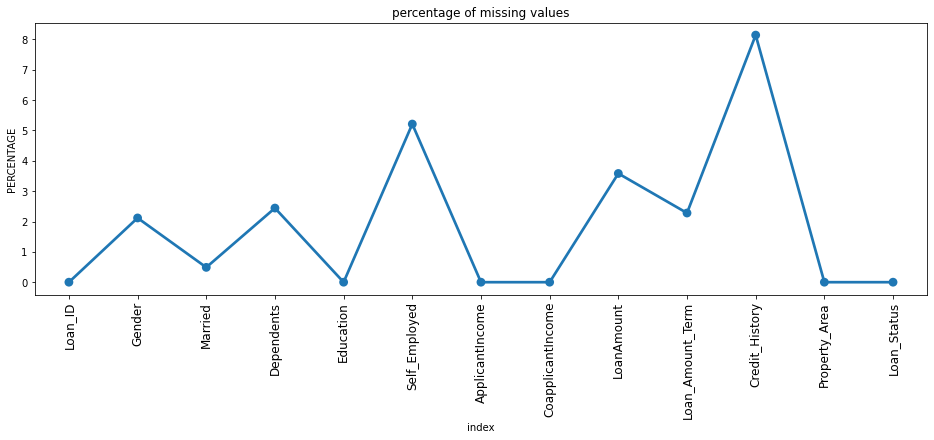

In [102]:
missing = pd.DataFrame((loan_dataset.isnull().sum())*100/loan_dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [103]:
# just to verify that showing null values count is true.
# null in excel sheet = [B]+[C]+[D]+[F]+[I]+[J]+[K]

loan_dataset.loc[loan_dataset['Gender'].isnull() == True]

# you can change the name ('Avg _Monthly_Long_Distance_Charges') to ('columun names which are haning null values')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [104]:
# missing values in percentages
loan_dataset.isnull().sum() * 100 / len(loan_dataset)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [105]:
# Missing values treatment
# removing missing values
# loan_dataset.dropna(how = 'any', inplace = True)


# in this particular dataframe any column which will be having null values or NA values will be filled up with zero
# loan_dataset.fillna(0) 

In [106]:
# for removing the whole column
# loan_dataset.drop(columns = ['',''], axis=1, inplace=True)

In [107]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
# number of rows and columns
loan_dataset.shape

# will give you all the unique values in the column
#loan_dataset["column_name"].unique()

(614, 13)

In [109]:
print("Numbers of rows :- ", loan_dataset.shape[0])
print("Numbers of columns :- ", loan_dataset.shape[1])

Numbers of rows :-  614
Numbers of columns :-  13


In [110]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [111]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [113]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [114]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [115]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [116]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [117]:
# for removing the "Loan_ID" column from the table
loan_dataset.drop(columns = ['Loan_ID'], axis=1, inplace=True)

In [118]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [119]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [120]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value='4')

In [121]:
loan_dataset['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [122]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

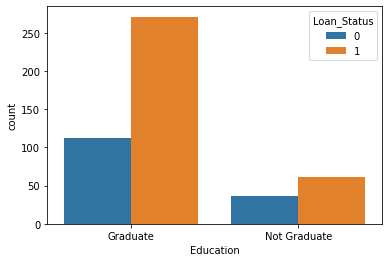

In [123]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

In [124]:
loan_dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [125]:
feature = ['Married', 'Dependents', 'Gender', 'Education',
       'Self_Employed']

In [126]:
list(enumerate(feature))

[(0, 'Married'),
 (1, 'Dependents'),
 (2, 'Gender'),
 (3, 'Education'),
 (4, 'Self_Employed')]

C:\Users\pralay kalaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pralay kalaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pralay kalaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

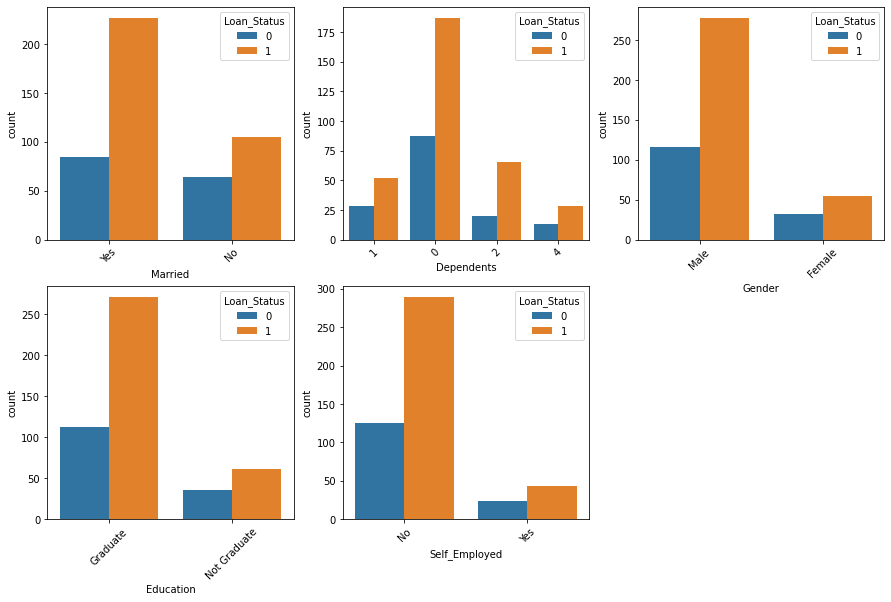

In [127]:
plt.figure(figsize = (15, 30))
for i in enumerate(feature):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1],hue='Loan_Status',data=loan_dataset)
    plt.xticks(rotation = 45)

In [128]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [129]:
loan_dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [130]:
# if you want to check the datatype of changed column format
# just copy paste the column name in into inverted commas
loan_dataset['Married'].unique()

array([1, 0], dtype=int64)

In [131]:
loan_dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [132]:
# if you want to check what is in 0's and 1's
# just copy paste the column name in into inverted commas
loan_dataset['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [133]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [134]:
# separating the data and label
# store feature matrix (independent variables) in X and response (target variables) in vectpr Y
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [135]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Feature scaling

In [136]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [137]:
# feature scaling allows us to put our features into the same scale.
# feature scaling is essential for ML algorithms that calculates distances between data.
# if not scaled features with higher value range starts dominating when calculating distances.

# the ML algoriths that requires feature scaling are mostly :-
# 1. KNN - k nearest neighbour.
# 2. neural networks.
# 3. SVM - support vector machine.
# 4. linear regression.
# 5. logistic regression.

# the ML algoriths that do not requires feature scaling are mostly non-linear ML algorithms like :-
# 1. decision tree.
# 2. random forest
# 3. adaboost
# 4. Naïve Bayes
# 5. etc

# any algorithm which is not distance based is not affected by feature scaling.

# doing feature scaling on the following columns:-
# 1. ApplicantIncome.
# 2. CoapplicantIncome.
# 3. LoanAmount.
# 4. Loan_Amount_Term.

In [140]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [145]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols] = st.fit_transform(X[cols])

In [146]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0
2,1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2
3,1,1,0,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2
4,1,0,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2
5,1,1,2,1,1,0.009319,0.999978,1.520245,0.275542,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.435196,-0.604633,-0.916831,0.275542,1.0,0
610,1,1,4,1,0,-0.222210,-0.604633,-1.302286,-2.487549,1.0,0
611,1,1,1,1,0,0.478206,-0.512854,1.346168,0.275542,1.0,2
612,1,1,2,1,0,0.391846,-0.604633,0.525520,0.275542,1.0,2


# Splitting the dataset into the train set and the test set and applying K-Fold Cross Validation

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [164]:
# for model evaluation and also to find best model for this dataset we have to find accuracy of different ML models.
# and the average cross validation score.
# so lets create a function to perform this task.
# otherwise we have to write this code again and again fro each and every models.
# so, let me create one user define function.

In [189]:
model_df = {}
def model_val(model,X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(Y_test,Y_pred)}")

# to find our best model for this datset with train test split, we are going to use cross validation.
# cross validation allows to compare different ML algorithms and get a sense of how well they will work in practice.

# now performing 5-fold cross validation

    score = cross_val_score(model,X,Y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model] = round(np.mean(score)*100,2)
    # key = value

In [200]:
# after every model run this :-
model_df

{LogisticRegression(): 80.21,
 SVC(): 79.38,
 DecisionTreeClassifier(): 70.62,
 RandomForestClassifier(): 79.58,
 GradientBoostingClassifier(): 77.71}

# 1. Logistic Regression

In [190]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [191]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# to find accuracy score after train test split and cross val score after 5 fold corss validation.
# we are going to call "model_val" which we have just defined and created above
model_val(model,X,Y)
# go up and run "model_df" before "1. Logistic Regression" Heading

LogisticRegression() accuracy is 0.8229166666666666
LogisticRegression() Avg cross val score is 0.8020833333333334


# 2. SVC - Support Vector Classifier

In [193]:
from sklearn import svm
model = svm.SVC()
# to find accuracy score after train test split and cross val score after 5 fold corss validation.
# we are going to call "model_val" which we have just defined and created above
model_val(model,X,Y)
# go up and run "model_df" before "1. Logistic Regression" Heading

SVC() accuracy is 0.8125
SVC() Avg cross val score is 0.7937500000000001


# 3.  Decision Tree Classifier

In [195]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# to find accuracy score after train test split and cross val score after 5 fold corss validation.
# we are going to call "model_val" which we have just defined and created above
model_val(model,X,Y)
# go up and run "model_df" before "1. Logistic Regression" Heading

DecisionTreeClassifier() accuracy is 0.7708333333333334
DecisionTreeClassifier() Avg cross val score is 0.70625


# 4. Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# to find accuracy score after train test split and cross val score after 5 fold corss validation.
# we are going to call "model_val" which we have just defined and created above
model_val(model,X,Y)
# go up and run "model_df" before "1. Logistic Regression" Heading

RandomForestClassifier() accuracy is 0.8229166666666666
RandomForestClassifier() Avg cross val score is 0.7958333333333332


# 5. Gradient Boosting Classifier

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
# to find accuracy score after train test split and cross val score after 5 fold corss validation.
# we are going to call "model_val" which we have just defined and created above
model_val(model,X,Y)
# go up and run "model_df" before "1. Logistic Regression" Heading

GradientBoostingClassifier() accuracy is 0.7916666666666666
GradientBoostingClassifier() Avg cross val score is 0.7770833333333333


In [206]:
# blank

In [207]:
# So, from this we can see that "LogisticRegression" is the best model for this dataset with avg cross val score "80.21%".
# That we can see before "1. Logistic Regression".
# But here we have train our models with default parameters.
# Press this (left shift = tab) inside "open and close curly brackets" of "model = ?" to view "Init signature".
# Do same steps to see all other algorithm's default parameters as well.

In [208]:
# blank

In [209]:
# But we can tune model parameters called as "Hyperparameter Tuning".
# So, lets perofrm that.

# Hyperparameter Tuning

In [210]:
# So, here in ML model there are 2 types of parameters :-
# 1. model parameters :- These parameters need to be learn from the data.
                        # Means model will learn these parameters during training phase.
                        # These are the fixed parameters.
                        # Eg :- linear regression "y=mx+c".
                        # where, m=slope : c=intercept.
                        # So, for this linear regression slope and intercept are learnt during training phase.
                        # So, here this slope and intercept are called as "model parameters".
# 2. hyper parameters :- These are adjustable parameters.
                        # That must be tuned in order to obtain a model with optimal performance.
                        # ML models can have many hyperparameters.
                        # And finding best combination of parameters can be treated as search problem.
                        # So, there are 2 best strategies for hyperparameter tuning :-
                            # 1. GridSearchCV :- It will go through all the intermediate combinations of parameters.
                                                # Which makes it computationally very expensive.
                            # 2. RandomisedSearch CV :- It will solve all the drawbacks of GridSearchCV.
                                                        # As it goes through only a fixed number of hyperparameter settings.
                                                        # It moves within a grid in a random pattern -
                                                        # - to find the best set of hyperparameters.
                                                        # This approach reduces unnecessary computation.

# So, here we are going to use "RandomisedSearchCV" for hyperparameter tuning.

In [220]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Logistic Regression

In [221]:
# just go in the upper "# 1. Logistic Regression".
# press "left shift + tab" key
# "Init signature" will be visible.
# many parameters will be visible there.
# but in that we are going to tune "c=?", "solver=?" parameter.

In [222]:
# firstly creating python dictionary which contains different values for our parameters.

log_reg_grid = {"C":np.logspace(-4,4,20), "solver":['liblinear']}

In [224]:
# check doc string, press "left shift + tab" key and change the parameter
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, n_iter=20, cv=5, verbose=True)

In [225]:
# training using fit method on our dataset that is independent variables and dependent variables
rs_log_reg.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [226]:
# checking best score
rs_log_reg.best_score_

0.80625

In [227]:
# checking best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

# 2. SVC - Support Vector Classifier

In [228]:
# just go in the upper "# 2. SVC - Support Vector Classifier".
# press "left shift + tab" key
# "Init signature" will be visible.
# many parameters will be visible there.
# but in that we are going to tune "c=?", "kernel=?" parameter.

In [229]:
# firstly creating python dictionary which contains different values for our parameters.

svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [230]:
# check doc string, press "left shift + tab" key and change the parameter
rs_svc = RandomizedSearchCV(svm.SVC(), param_distributions=svc_grid, n_iter=20, cv=5, verbose=True)

In [231]:
# training using fit method on our dataset that is independent variables and dependent variables
rs_svc.fit(X,Y)

C:\Users\pralay kalaskar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [232]:
# checking best score
rs_svc.best_score_

0.8083333333333333

In [233]:
# checking best parameters
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

# 3. Random Forest Classifier

In [293]:
RandomForestClassifier()

RandomForestClassifier()

In [294]:
# just go in the upper "# 4. Random Forest Classifier".
# press "left shift + tab" key
# "Init signature" will be visible.
# many parameters will be visible there.
# but in that we are going to tune "n_estimators=?", "max_features=?", "max_depth=?", -
                                    # - "min_samples_split", "min_samples_leaf" parameter.

In [295]:
# firstly creating python dictionary which contains different values for our parameters.

rf_grid = {'n_estimators':np.arange(10,1000,10), 'max_features':['auto','sqrt'], 'max_depth':[3,5,10,20,30],
           'min_samples_split':[2,5,20,50,100], 'min_samples_leaf':[1,2,5,10]}

In [296]:
# check doc string, press "left shift + tab" key and change the parameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, n_iter=20, cv=5, verbose=True)

In [297]:
# training using fit method on our dataset that is independent variables and dependent variables
rs_rf.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
  

In [298]:
# checking best score
rs_rf.best_score_

0.8104166666666668

In [299]:
# checking best parameters
rs_rf.best_params_

{'n_estimators': 90,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 20}

# So, the results are :-

In [300]:
# So, as you can see the performance of ML algorithm improves with hyperparameter tuning.
# That you can see over here for 3 algorithms below, that is compared befor and after hyperparameter tuning.

In [ ]:
LogisticRegression score Before Hyperparameter Tuning: 80.21
LogisticRegression score after Hyperparameter Tuning: 80.62
    
---------------------------------------------------------------------

SVC score Before Hyperparameter Tuning: 79.38
SVC score after Hyperparameter Tuning: 80.83
    
---------------------------------------------------------------------

RandomForestClassifier score Before Hyperparameter Tuning: 79.58
RandomForestClassifier score after Hyperparameter Tuning: 81.04

In [301]:
# So, we can say that the performance of the ML algorithm improves -
# - with a more acceptable choice of hyperparameter tuning and selection techniques.
# So, either you can select "support vector classifier" or "random forsst classifier" for production.
# I am selecting "RandomForestClassifier" for production. 
# So, now lets use our best algorithm "RandomForestClassifier" in our production.

In [302]:
# So, before we save our best model "RandomForestClassifier" -
# - we have to train our best model "RandomForestClassifier" on entire dataset -
# - with best parameters that we just found.

# Running the best model on the the X and Y data 

In [303]:
# so, lets copy X and Y variables from the above code

In [304]:
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [308]:
rf = RandomForestClassifier(n_estimators=90,  min_samples_split=20, min_samples_leaf=5, max_features='sqrt', max_depth=20)

In [309]:
rf.fit(X,Y)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=20, n_estimators=90)

# Saving the model

In [310]:
import joblib

In [311]:
# lets save our best model.
# again and again training is not required.
# and we can perform prediction using the saved model.

In [312]:
# "joblib.dump()" to save our model.
# instance of our model "rf".
# give any name like "loan_status_predict"
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [313]:
# our best model is successfully saved with the above name.

In [314]:
# in future you can perform prediction using the saved model.

In [315]:
# let me show you that.
# so, for that you have to write "joblib.load('')" to load "loan_status_predict" this saved model.

In [316]:
model = joblib.load('loan_status_predict')

In [317]:
# now you can see here that our saved model is successfully loaded.

In [320]:
# to show you how to perform prediction on unseen data.
# here i have created the pandas dataframe with different values that you can see below for our features.

import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

# let me execute this cell.

In [321]:
# see the data is loaded.
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [322]:
# so, we are going to predict whether loan is approved or not for the above data.

In [328]:
# assigning or storing the answer into a variable named "result".
model.predict(df)

array([0], dtype=int64)

In [ ]:
# you can see the output os "0".
# scroll up and see in "load_Status" 0 key is defined to what value
# HINT :- {# label encoding
            # loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)}
# you will find this code upside.
# that means 0 = loan not approved
# and 1 = loan approved

In [331]:
# now arranging  it into understandable way:-
result = model.predict(df)

In [332]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [ ]:
# we can say that "Loan Not Approved" with accuracy of "Loan "81.04%" that you can see in up above code.

# GUI - Graphical User Interface (for normal or end users to interact)

In [333]:
from tkinter import *
import joblib
import pandas as pd

In [334]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()

In [ ]:
# a new platform will pop-up.
# fill the data in that and see the status for that data.

In [ ]:
# ---------- END ----------